In [1]:
import pickle
import json
import numpy as np
from scipy import interpolate
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib import rc
rc('text', usetex=True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
# sns.set_context("paper")
sns.set()
sns.set_context('talk')
import pandas as pd
%matplotlib inline

In [100]:
Cider_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-CIDEr.csv")
Cider_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-CIDEr.csv")
Cider_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-CIDEr.csv")
Cider_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-CIDEr.csv')

In [108]:
TML_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-train_ml_loss.csv")
TML_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-train_ml_loss.csv")
TML_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-train_ml_loss.csv")
TML_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-train_ml_loss.csv')

In [134]:
TL_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-train_loss.csv")
TL_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-train_loss.csv")
TL_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-train_loss.csv")
TL_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-train_loss.csv')

In [121]:
grad_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-RNN_grad_norm.csv")
grad_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-RNN_grad_norm.csv")
grad_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-RNN_grad_norm.csv")
grad_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-RNN_grad_norm.csv')

In [139]:
lr_fn_reset_ep0_lr = pd.read_csv("../Results/tensorboard_res/run_decore-word2_tword015_coco_idf_a09_finetune_adamreset_ep0_lr-tag-learning_rate.csv")
lr_fn_reset = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune_adamreset-tag-learning_rate.csv")
lr_getgo = pd.read_csv("../Results/tensorboard_res/run_edgar-word2_tword015_CocoGlove_idf_bis_a09-tag-learning_rate.csv")
lr_fn = pd.read_csv('../Results/tensorboard_res/run_edgar-word2_tword015_coco_idf_a09_finetune-tag-learning_rate.csv')

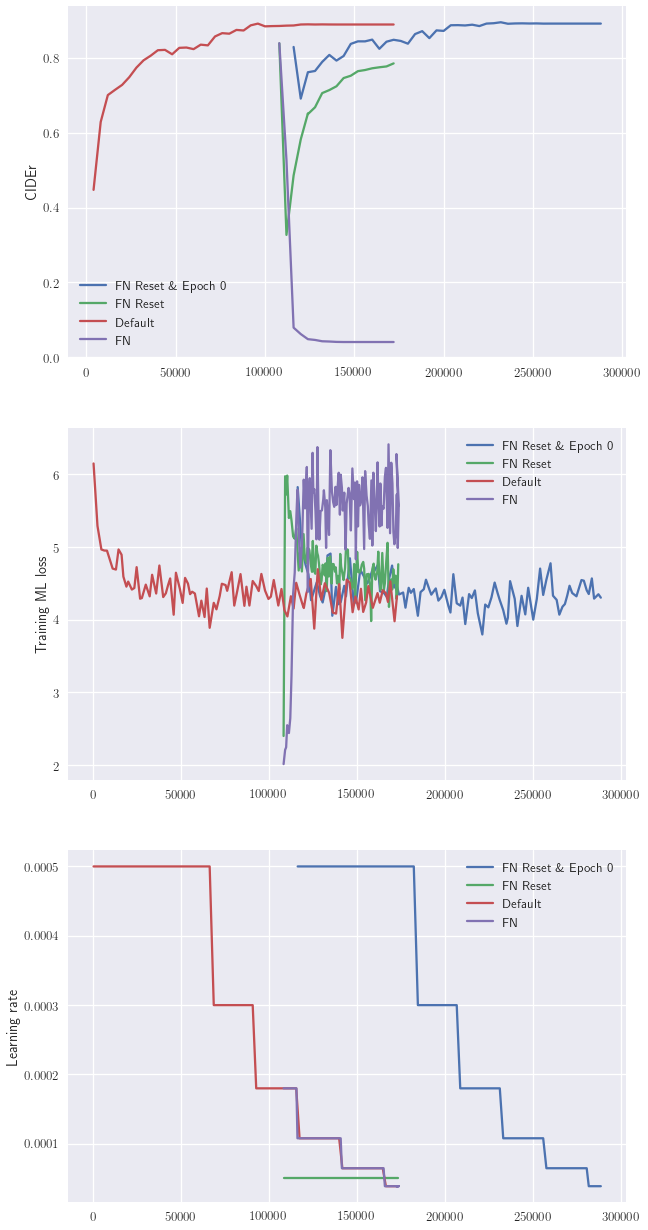

In [148]:
f, axs = plt.subplots(3, 1, figsize=(10,22))
axs[0].plot(Cider_fn_reset_ep0_lr['Step'], Cider_fn_reset_ep0_lr['Value'], label="FN Reset \& Epoch 0")
axs[0].plot(Cider_fn_reset['Step'], Cider_fn_reset['Value'], label="FN Reset")
axs[0].plot(Cider_getgo['Step'], Cider_getgo['Value'], label="Default")
axs[0].plot(Cider_fn['Step'], Cider_fn['Value'], label="FN")
axs[0].legend()
axs[0].set_ylabel('CIDEr')

axs[1].plot(TML_fn_reset_ep0_lr['Step'][::10], TML_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
axs[1].plot(TML_fn_reset['Step'][::10], TML_fn_reset['Value'][::10], label="FN Reset")
axs[1].plot(TML_getgo['Step'][::10], TML_getgo['Value'][::10], label="Default")
axs[1].plot(TML_fn['Step'][::10], TML_fn['Value'][::10], label="FN")
axs[1].legend()
axs[1].set_ylabel('Training ML loss')


axs[2].plot(lr_fn_reset_ep0_lr['Step'][::10], lr_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
axs[2].plot(lr_fn_reset['Step'][::10], lr_fn_reset['Value'][::10], label="FN Reset")
axs[2].plot(lr_getgo['Step'][::10], lr_getgo['Value'][::10], label="Default")
axs[2].plot(lr_fn['Step'][::10], lr_fn['Value'][::10], label="FN")
axs[2].legend()
axs[2].set_ylabel('Learning rate')


# axs[1][1].plot(TL_fn_reset_ep0_lr['Step'][::10], TL_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
# axs[1][1].plot(TL_fn_reset['Step'][::10], TL_fn_reset['Value'][::10], label="FN Reset")
# axs[1][1].plot(TL_getgo['Step'][::10], TL_getgo['Value'][::10], label="Default")
# axs[1][1].plot(TL_fn['Step'][::10], TL_fn['Value'][::10], label="FN")
# axs[1][1].legend()

# axs[1][0].plot(grad_fn_reset_ep0_lr['Step'][::10], grad_fn_reset_ep0_lr['Value'][::10], label="FN Reset \& Epoch 0")
# axs[1][0].plot(grad_fn_reset['Step'][4::10], grad_fn_reset['Value'][4::10], label="FN Reset")
# axs[1][0].plot(grad_getgo['Step'][::10], grad_getgo['Value'][::10], label="Default")
# axs[1][0].plot(grad_fn['Step'][::10], grad_fn['Value'][::10], label="FN")
# axs[1][0].legend()
plt.savefig('../figures/adam_reset.png',
            dpi=300, bbox_inches='tight')